<a href="https://colab.research.google.com/github/LKPushpaj/Analytical-Finanace/blob/master/INVIDEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Invideo_assignment.csv to Invideo_assignment.csv


In [2]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['Invideo_assignment.csv']))
%load_ext google.colab.data_table


In [3]:
df=df2.copy()


In [4]:
#LETS DROP THOSE COULMNS IN WHICH THE USER HAVEN'T EXPORTED A SINGLE VIDEO, i.e the rows in which the video creation date in empty

In [5]:
df.dropna(inplace=True)

In [6]:
df.head(15)

ID  Created At  Video creation date
0   467537  2020-08-02  2020-08-23T18:36:12
1   467537  2020-08-02  2020-08-23T18:50:10
2   467537  2020-08-02  2020-08-23T19:21:07
3   467537  2020-08-02  2020-09-07T19:28:12
4   467537  2020-08-02  2020-09-07T19:37:42
5   467537  2020-08-02  2020-11-09T02:08:34
6   467537  2020-08-02  2020-11-09T02:42:23
18  467549  2020-08-02  2020-08-02T00:31:51
20  467551  2020-08-02  2020-08-03T19:06:57
21  467551  2020-08-02  2020-08-07T00:49:00
28  467560  2020-08-02  2020-08-02T00:25:00
29  467561  2020-08-02  2020-08-12T05:15:30
41  467574  2020-08-02  2020-08-02T03:05:22
42  467574  2020-08-02  2020-08-02T17:23:08
49  467581  2020-08-02  2020-10-04T03:31:40

In [7]:
df.nunique()

ID                      93873
Created At                138
Video creation date    350624
dtype: int64

In [8]:
df[['Date of export','Time']] = df['Video creation date'].str.split('T',expand=True)



In [9]:
df['occurences'] = df.groupby('ID').cumcount()
df

ID  Created At  ...      Time occurences
0       467537  2020-08-02  ...  18:36:12          0
1       467537  2020-08-02  ...  18:50:10          1
2       467537  2020-08-02  ...  19:21:07          2
3       467537  2020-08-02  ...  19:28:12          3
4       467537  2020-08-02  ...  19:37:42          4
...        ...         ...  ...       ...        ...
728820  935785  2020-12-17  ...  14:05:44          0
728826  935791  2020-12-17  ...  14:28:34          0
728828  935793  2020-12-17  ...  14:25:40          0
728850  935815  2020-12-17  ...  14:18:20          0
728893  935858  2020-12-17  ...  14:33:13          0

[356413 rows x 6 columns]

In [10]:
df['Created At']= pd.to_datetime(df['Created At'])
df['Date of export']= pd.to_datetime(df['Date of export'])

In [11]:
af=df.copy()

In [12]:
af['Difference of days'] = (af['Date of export']-af['Created At']).dt.days


In [13]:
af.head(5000)

ID Created At  ... occurences Difference of days
0     467537 2020-08-02  ...          0                 21
1     467537 2020-08-02  ...          1                 21
2     467537 2020-08-02  ...          2                 21
3     467537 2020-08-02  ...          3                 36
4     467537 2020-08-02  ...          4                 36
...      ...        ...  ...        ...                ...
9244  472955 2020-08-03  ...         28                 96
9245  472955 2020-08-03  ...         29                 96
9246  472955 2020-08-03  ...         30                 96
9255  472964 2020-08-03  ...          0                  0
9259  472968 2020-08-03  ...          0                  4

[5000 rows x 7 columns]

In [14]:
af.loc[af['Difference of days'] >= 35, 'user stayed for atleast 5 weeks'] = 'True' 

In [15]:
af

ID Created At  ... Difference of days user stayed for atleast 5 weeks
0       467537 2020-08-02  ...                 21                             NaN
1       467537 2020-08-02  ...                 21                             NaN
2       467537 2020-08-02  ...                 21                             NaN
3       467537 2020-08-02  ...                 36                            True
4       467537 2020-08-02  ...                 36                            True
...        ...        ...  ...                ...                             ...
728820  935785 2020-12-17  ...                  0                             NaN
728826  935791 2020-12-17  ...                  0                             NaN
728828  935793 2020-12-17  ...                  0                             NaN
728850  935815 2020-12-17  ...                  0                             NaN
728893  935858 2020-12-17  ...                  0                             NaN

[356413 rows x 8 columns]

In [16]:
UserID=af[af['user stayed for atleast 5 weeks'] == 'True']['ID'].unique()

In [17]:
bf=af[af['ID'].isin(UserID)]#the dataframe consistting of only the user who have stayed for atleast a 5 weeks.

In [18]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152203 entries, 0 to 582537
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ID                               152203 non-null  int64         
 1   Created At                       152203 non-null  datetime64[ns]
 2   Video creation date              152203 non-null  object        
 3   Date of export                   152203 non-null  datetime64[ns]
 4   Time                             152202 non-null  object        
 5   occurences                       152203 non-null  int64         
 6   Difference of days               152203 non-null  int64         
 7   user stayed for atleast 5 weeks  74544 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 10.5+ MB


In [19]:
af.loc[af['Difference of days'] >= 90, '3 month window'] = 'True' 

In [20]:
af.head(5000)

ID Created At  ... user stayed for atleast 5 weeks 3 month window
0     467537 2020-08-02  ...                             NaN            NaN
1     467537 2020-08-02  ...                             NaN            NaN
2     467537 2020-08-02  ...                             NaN            NaN
3     467537 2020-08-02  ...                            True            NaN
4     467537 2020-08-02  ...                            True            NaN
...      ...        ...  ...                             ...            ...
9244  472955 2020-08-03  ...                            True           True
9245  472955 2020-08-03  ...                            True           True
9246  472955 2020-08-03  ...                            True           True
9255  472964 2020-08-03  ...                             NaN            NaN
9259  472968 2020-08-03  ...                             NaN            NaN

[5000 rows x 9 columns]

In [21]:
actual_user=af[af['3 month window'] == 'True']['ID'].unique()

In [22]:
cf=af[af['ID'].isin(actual_user)]#the dataframe consistting of only the user who have stayed for atleast a 5 weeks.

In [23]:
cf.head(5000)

ID Created At  ... user stayed for atleast 5 weeks 3 month window
0      467537 2020-08-02  ...                             NaN            NaN
1      467537 2020-08-02  ...                             NaN            NaN
2      467537 2020-08-02  ...                             NaN            NaN
3      467537 2020-08-02  ...                            True            NaN
4      467537 2020-08-02  ...                            True            NaN
...       ...        ...  ...                             ...            ...
20892  479686 2020-08-05  ...                            True           True
20893  479686 2020-08-05  ...                            True           True
20894  479686 2020-08-05  ...                            True           True
20895  479686 2020-08-05  ...                            True           True
20896  479686 2020-08-05  ...                            True           True

[5000 rows x 9 columns]

In [24]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54797 entries, 0 to 286282
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               54797 non-null  int64         
 1   Created At                       54797 non-null  datetime64[ns]
 2   Video creation date              54797 non-null  object        
 3   Date of export                   54797 non-null  datetime64[ns]
 4   Time                             54797 non-null  object        
 5   occurences                       54797 non-null  int64         
 6   Difference of days               54797 non-null  int64         
 7   user stayed for atleast 5 weeks  35277 non-null  object        
 8   3 month window                   11580 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 4.2+ MB


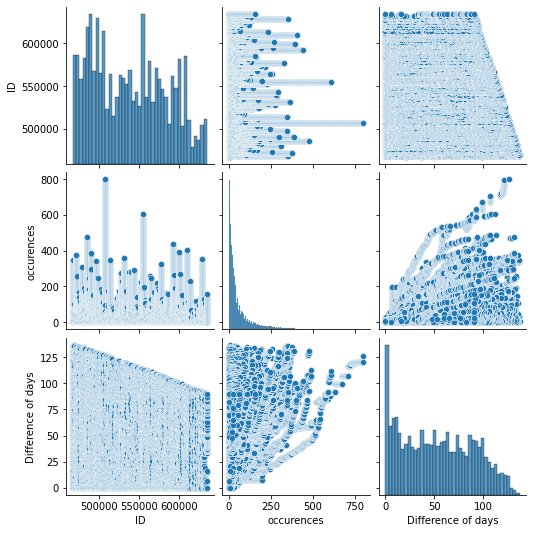

In [25]:
import seaborn as sns

sns.pairplot(cf)

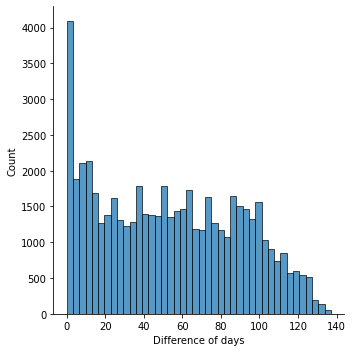

In [26]:
sns.displot(cf['Difference of days'])

In [27]:
days=cf[(cf['3 month window'] == 'True') & (cf['user stayed for atleast 5 weeks']=='True')]['occurences']
ID=cf[(cf['3 month window'] == 'True') & (cf['user stayed for atleast 5 weeks']=='True')]['ID']

In [29]:
cf.replace('True',1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [30]:
cf.fillna(value=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [31]:
cf

ID Created At  ... user stayed for atleast 5 weeks 3 month window
0       467537 2020-08-02  ...                             0.0            0.0
1       467537 2020-08-02  ...                             0.0            0.0
2       467537 2020-08-02  ...                             0.0            0.0
3       467537 2020-08-02  ...                             1.0            0.0
4       467537 2020-08-02  ...                             1.0            0.0
...        ...        ...  ...                             ...            ...
286278  634420 2020-09-18  ...                             1.0            0.0
286279  634420 2020-09-18  ...                             1.0            0.0
286280  634420 2020-09-18  ...                             1.0            0.0
286281  634420 2020-09-18  ...                             1.0            0.0
286282  634420 2020-09-18  ...                             1.0            1.0

[54797 rows x 9 columns]